In [73]:
import pandas as pd
import pathlib

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import country_converter as coco

In [ ]:
from dash_bootstrap_components import 

In [71]:
p = pathlib.Path('.')
path_name = {path:path.name.replace('tbl','').replace('.csv', '') for path in list(p.glob('data/*.csv'))}
tables = {path.name.replace('tbl','').replace('.csv', ''):pd.read_csv(path, index_col=f'{path_name[path]}ID') for path in path_name}

In [75]:
cc = coco.CountryConverter()
tables['Country']['CountryCode'] = cc.pandas_convert(tables['Country']['CountryName'])


In [72]:
tables['Country']

,CountryName
CountryID,
48,China
79,France
118,Japan
167,New Zealand
240,United Kingdom
241,United States
257,Germany
258,Russia


In [79]:
tables['Film']['FilmReleaseDate'] = pd.to_datetime(tables['Film']['FilmReleaseDate'])
tables['Film']['FilmBoxOfficeDollars'] = tables['Film']['FilmBoxOfficeDollars'] /10**6
tables['Film']['FilmBudgetDollars'] = tables['Film']['FilmBudgetDollars'] /10**6
tables['Film']['FilmBenefits'] = tables['Film']['FilmBoxOfficeDollars'] - tables['Film']['FilmBudgetDollars']
tables['Film']['FilmReleaseDate'] = pd.to_datetime(tables['Film']['FilmReleaseDate'])
tables['Film']['FilmReleaseYear'] = tables['Film']['FilmReleaseDate'].dt.year
tables['Actor']['ActorDOB'] = pd.to_datetime(tables['Actor']['ActorDOB'])

In [65]:
df = tables['Actor'].merge(tables['Cast'], left_index=True, right_on='CastActorID').merge(tables['Film'], left_on='CastFilmID', right_index=True)
df['Age'] = ( df['FilmReleaseDate'] - df['ActorDOB'] ) / 365
df['Age'] = df['Age'].dt.days.round(0)
df = df[df['Age'].notna() == True]

In [66]:
df['-20years'] = df['Age'] < 20
df['20-40years'] = df['Age'].between(20,40)
df['40-60years'] = df['Age'].between(40,60)
df['+60years'] = df['Age'] >= 60

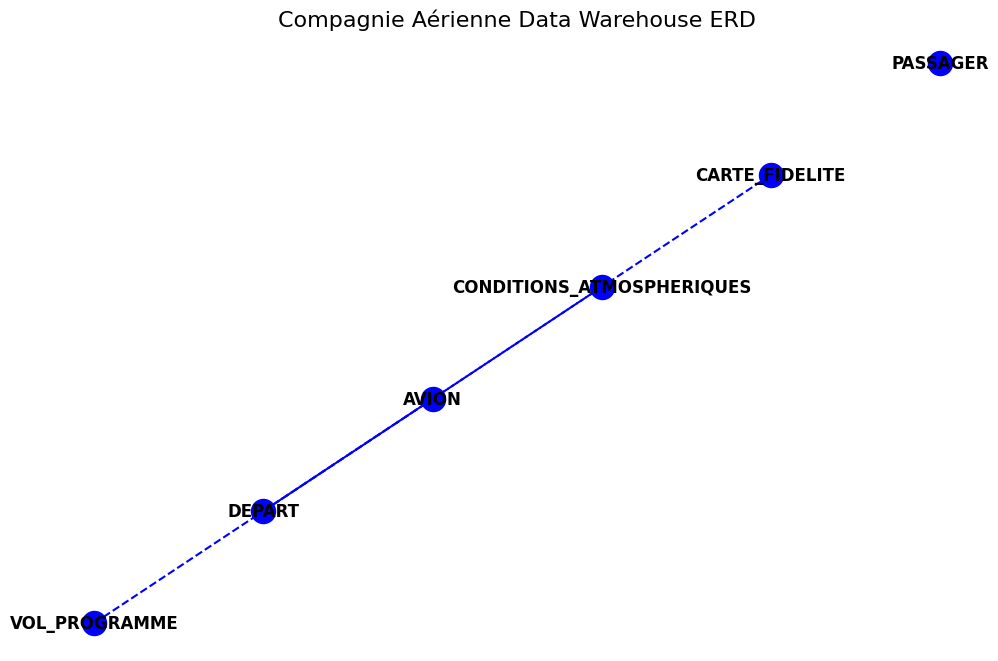

In [69]:
import matplotlib.pyplot as plt

# Define the tables and their relationships
tables = {
    "VOL_PROGRAMME": ["NUMERO", "VILLE_DEPART", "VILLE_ARRIVEE", "HEURE_DEPART", "HEURE_ARRIVEE", "DISTANCE_PREVISIONNELLE", "FREQUENCE"],
    "DEPART": ["DATE", "NUMERO_VOL", "NUMERO_AVION"],
    "AVION": ["NUMERO", "CONSTRUCTEUR", "MODELE", "CAPACITE"],
    "CONDITIONS_ATMOSPHERIQUES": ["DATE", "QUANTITE_DE_CARBUANT"],
    "CARTE_FIDELITE": ["NUMERO_CARTE", "SOLDE"],
    "PASSAGER": ["NOM", "PRENOM", "ADRESSE", "NUMERO_TELEPHONE"],
}

relationships = [
    ("VOL_PROGRAMME", "DEPART", "NUMERO"),
    ("DEPART", "AVION", "NUMERO_AVION"),
    ("DEPART", "CONDITIONS_ATMOSPHERIQUES", "DATE"),
    ("CARTE_FIDELITE", "DEPART", "NUMERO_CARTE"),
]

# Create the ERD plot
plt.figure(figsize=(12, 8))
for table in tables:
    plt.scatter(table, table, marker="o", s=300, c="blue")
    plt.text(table, table, table, ha="center", va="center", fontsize=12, fontweight="bold")

for rel in relationships:
    plt.plot([rel[0], rel[1]], [rel[0], rel[1]], "b--")

plt.title("Compagnie Aérienne Data Warehouse ERD", fontsize=16)
plt.axis("off")
plt.show()

pd.read_csv


In [108]:
import csv
import urllib
with urllib.request.urlopen('https://github.com/gavinr/world-countries-centroids/blob/master/dist/countries.json') as csvfile:
    print(csvfile)
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(', '.join(row))

Error: iterator should return strings, not bytes (the file should be opened in text mode)

In [89]:
df = tables['Film'].merge(tables["Country"], left_on='FilmCountryID', right_index=True)[['CountryName','CountryCode','FilmBoxOfficeDollars','FilmBudgetDollars','FilmName']]
df = df[['CountryCode','FilmBoxOfficeDollars','FilmBudgetDollars']].groupby('CountryCode').mean().merge(df[['CountryCode','FilmName']].groupby('CountryCode').count(),left_index=True,right_index=True)
df.index

Index(['CHN', 'DEU', 'FRA', 'GBR', 'JPN', 'NZL', 'RUS', 'USA'], dtype='object', name='CountryCode')

In [124]:
coordo

,longitude,latitude,COUNTRY,ISO,COUNTRYAFF,AFF_ISO
0,-170.700732,-14.305712,American Samoa,AS,United States,US
1,166.638003,19.302046,United States Minor Outlying Islands,UM,United States,US
2,-159.787689,-21.222613,Cook Islands,CK,New Zealand,NZ
3,-149.400417,-17.674684,French Polynesia,PF,France,FR
4,-169.868781,-19.052309,Niue,NU,New Zealand,NZ
...,...,...,...,...,...,...
244,145.741197,15.178064,Northern Mariana Islands,MP,United States,US
245,134.579651,7.534776,Palau,PW,Palau,PW
246,98.670499,59.039434,Russian Federation,RU,Russian Federation,RU
247,-3.651625,40.365008,Spain,ES,Spain,ES


In [129]:
coordo = pd.read_csv(r'C:\Users\nicom\Downloads\countries.csv')
coordo['Code'] = cc.pandas_convert(coordo['COUNTRY'],not_found=None)
df = df.merge(coordo, left_index=True,right_on='Code')

Bonaire not found in regex


Saba not found in regex
Saint Eustatius not found in regex
Juan De Nova Island not found in regex
Glorioso Islands not found in regex
Canarias not found in regex


In [140]:
fig = go.Figure(data=go.Choropleth(
    locations = df.index,
    z = df['FilmBoxOfficeDollars'],
    text = df.index,
    autocolorscale=True,
    colorscale="rdylbu",
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = ' M',
    colorbar_tickprefix = '$ ',
    colorbar_title = 'FilmBoxOfficeDollars',
))

fig2 = px.scatter_geo(df, locations=df.index,
                     size="FilmName")

fig.add_trace(fig2.data[0])

fig.update_layout(
        autosize=False,
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=4,
                autoexpand=True
            ),
            width=800,
        #     height=400,
    )

fig.update_traces(hovertemplate = 'BoxOffice=$ %{text}M<br>iso_alpha=%{location}<extra></extra>', text = df['FilmBoxOfficeDollars'])



fig.show()

In [100]:
import pandas as pd
import plotly.express as px
import requests

point_geo = {'type': 'FeatureCollection',
 'name': 'locations',
 'features': [{'type': 'Feature',
   'properties': {'description': 'xyz', 'name': 'A'},
   'geometry': {'type': 'Point', 'coordinates': [43.58283, -79.61944]}},
  {'type': 'Feature',
   'properties': {'description': 'xyz','name': 'B '},
   'geometry': {'type': 'Point', 'coordinates': [43.58294, -79.61244]}}
             ]}
abc = pd.DataFrame({'FID':['19','18'],'MEDIAN INCOME':[60000,70000]})
def_= requests.get('https://opendata.arcgis.com/datasets/3a90af0bfd034a48a1bee2f7ff4f105a_0.geojson').json()
ghi_ = requests.get('https://opendata.arcgis.com/datasets/0e149347e0b54724996d99080bed1874_0.geojson').json()
fig3 = px.choropleth_mapbox(abc, geojson=def_, 
            featureidkey='properties.FID', locations='FID', color='MEDIAN INCOME', 
            mapbox_style="carto-positron",
            opacity=0.4,
            color_continuous_scale = px.colors.sequential.Inferno_r ,
            zoom=12, center = {"lat": 43.5887 , "lon": -79.64})

fig3.update_layout(
    mapbox = {
        'layers': [
## this part works
            {'source': ghi_,
            'type': "line", 'color': "royalblue", 'opacity':1, 'line':{'width':3} },
## this part does not work
            {'source':point_geo, 'type':'circle', 'circle':{'radius':2} }
                ]},
)

lats = [item['geometry']['coordinates'][0] for item in point_geo['features']]
lons = [item['geometry']['coordinates'][1] for item in point_geo['features']]
texts = [item['properties']['description'] for item in point_geo['features']]


fig3.add_scattermapbox(
    lat = lats,
    lon = lons,
    mode = 'markers+text',
    text = texts,
    marker_size=12,
    marker_color='rgb(235, 0, 100)'
)

In [47]:
df = tables['Actor'].merge(tables['Cast'], left_index=True, right_on='CastActorID').merge(tables['Film'][['FilmName','FilmBoxOfficeDollars', 'FilmBudgetDollars', 'FilmBenefits']], left_on='CastFilmID', right_index=True)
    
df = df.groupby('ActorName').mean().sort_values('FilmBoxOfficeDollars', ascending=False)

C:\Users\nicom\AppData\Local\Temp\ipykernel_4128\4254613788.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [50]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=df.index, y=df['FilmBoxOfficeDollars'].iloc[0:10]))

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

fig



In [16]:
tables['Actor']

,ActorName,ActorDOB,ActorGender
ActorID,,,
1,Tom Cruise,1962-07-03 09:53:21.000,Male
2,Sam Neill,1947-09-14 00:00:00.000,Male
3,Laura Dern,1967-02-10 00:00:00.000,Female
4,Jeff Goldblum,1952-10-22 00:00:00.000,Male
5,Richard Attenborough,1923-08-29 00:00:00.000,Male
...,...,...,...
337,Thomas F. Wilson,1959-04-15 00:00:00.000,Male
338,Timothy Dalton,1944-03-21 00:00:00.000,Male
339,Benicio Del Toro,1967-02-19 00:00:00.000,Male


In [20]:
df = tables['Cast'].merge(tables['Actor'],left_on='CastActorID', right_index=True)

In [21]:
df = df.merge(tables['Film'],left_on='CastFilmID', right_index=True)

In [46]:
df[df['ActorName'] == 'Keira Knightley']

,CastFilmID,CastActorID,CastCharacterName,ActorName,ActorDOB,ActorGender,FilmName,FilmReleaseDate,FilmDirectorID,FilmLanguageID,...,FilmStudioID,FilmSynopsis,FilmRunTimeMinutes,FilmCertificateID,FilmBudgetDollars,FilmBoxOfficeDollars,FilmOscarNominations,FilmOscarWins,FilmBenefits,FilmReleaseYear
CastID,,,,,,,,,,,,,,,,,,,,,
251,48,64,Sabé,Keira Knightley,1985-03-26 00:00:00.000,Female,Star Wars: Episode I - The Phantom Menace,1999-07-16,7.0,1.0,...,13.0,"The evil Trade Federation, led by Nute Gunray ...",133.0,1.0,115.0,924.288297,3.0,0.0,809.288297,1999.0
68,14,64,Elizabeth Swann,Keira Knightley,1985-03-26 00:00:00.000,Female,Pirates of the Caribbean: At World's End,2007-05-24,22.0,1.0,...,3.0,"Captain Barbossa, Will Turner and Elizabeth Sw...",168.0,4.0,150.0,952.404152,2.0,0.0,802.404152,2007.0
107,21,64,Elizabeth Swann,Keira Knightley,1985-03-26 00:00:00.000,Female,Pirates of the Caribbean: Dead Man's Chest,2006-07-06,22.0,1.0,...,3.0,Jack Sparrow races to recover the heart of Dav...,150.0,4.0,150.0,1065.659812,4.0,1.0,915.659812,2006.0
199,40,64,Elizabeth Swann,Keira Knightley,1985-03-26 00:00:00.000,Female,Pirates of the Caribbean: Curse of the Black P...,2003-08-08,22.0,1.0,...,3.0,Blacksmith Will Turner teams up with eccentric...,143.0,3.0,125.0,655.011224,5.0,0.0,530.011224,2003.0


In [43]:
actordollars = df.groupby('ActorName').aggregate(['mean','std'])[['FilmBudgetDollars','FilmBoxOfficeDollars']]
actorcount = df.groupby('ActorName').count()['FilmName']

actordollars.merge(actorcount, left_index=True,right_index=True).sort_values([('FilmBoxOfficeDollars','mean')], ascending=False).head(20)

C:\Users\nicom\AppData\Local\Temp\ipykernel_46332\506282210.py:1: FutureWarning: ['CastCharacterName', 'ActorDOB', 'ActorGender', 'FilmName', 'FilmReleaseDate', 'FilmSynopsis'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  actordollars = df.groupby('ActorName').aggregate(['mean','std'])[['FilmBudgetDollars','FilmBoxOfficeDollars']]
C:\Users\nicom\AppData\Local\Temp\ipykernel_46332\506282210.py:4: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  actordollars.merge(actorcount, left_index=True,right_index=True).sort_values([('FilmBoxOfficeDollars','mean')], ascending=False).head(20)


,"(FilmBudgetDollars, mean)","(FilmBudgetDollars, std)","(FilmBoxOfficeDollars, mean)","(FilmBoxOfficeDollars, std)",FilmName
ActorName,,,,,
Kate Winslet,200.00,NaN,1835.400000,NaN,1
Billy Zane,200.00,NaN,1835.400000,NaN,1
Bill Nighy,150.00,0.000000,1009.031982,80.083845,2
Stellan Skarsgard,150.00,0.000000,1009.031982,80.083845,2
Laura Dern,63.00,NaN,920.100000,NaN,1
Richard Attenborough,63.00,NaN,920.100000,NaN,1
Ralph Fiennes,150.00,0.000000,917.233761,30.010637,2
Keira Knightley,135.00,17.795130,899.340871,173.970354,4
Emma Watson,131.00,20.736441,897.090449,68.285695,5
